In [60]:
from dotenv import load_dotenv
load_dotenv()

from langchain_openai import OpenAI, OpenAIEmbeddings
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [61]:
urls = [
    "https://langchain-ai.github.io/langgraph/concepts/why-langgraph",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows",
    "https://langchain-ai.github.io/langgraph/how-tos/graph-api/#map-reduce-and-the-send-api"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        

In [62]:
doc_list = [doc for sublist in docs for doc in sublist]
doc_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \

In [63]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
doc_splits = text_splitter.split_documents(doc_list)
doc_splits[:2]

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Overview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n 

In [64]:
## Add all this chunks to vector db

vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(model='text-embedding-3-small')
)

retriever = vectorstore.as_retriever()

In [65]:
retriever.invoke("what is langgraph",k = 2)

[Document(id='4cd00bb0-6d21-454f-8d4c-26a86e1a430b', metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Table of contents\n    \n\n\n\n\n      Learn LangGraph basics\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOverview¶\nLangGraph is built for developers who want to build powerful, adaptable AI agents. Developers choose LangGraph for:\n\nReliability and controllability. Steer agent actions with moderation checks and human-in-the-loop approvals. LangGraph persists context for long-running workflows, keeping your agents on course.\nLow-level and extensible. Build custom agents with fully descriptive, low-level primitives free from rigid abstractions that limit customization. Design scalable multi-agent systems, with each agent serving a specific role tailored to your use case.\nFirst-class streaming support. With token-by-token 

In [66]:
## Retriever to retriever tool

from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    name="retriever_vector_langgraph_blog",
    description='search and run information about langgraph'
)

In [67]:
retriever_tool

Tool(name='retriever_vector_langgraph_blog', description='search and run information about langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000209305363E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000209B2081E00>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000020930537740>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000209B2081E00>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_conte

In [68]:
retriever_tool.invoke("what is langgraph")

'Table of contents\n    \n\n\n\n\n      Learn LangGraph basics\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOverview¶\nLangGraph is built for developers who want to build powerful, adaptable AI agents. Developers choose LangGraph for:\n\nReliability and controllability. Steer agent actions with moderation checks and human-in-the-loop approvals. LangGraph persists context for long-running workflows, keeping your agents on course.\nLow-level and extensible. Build custom agents with fully descriptive, low-level primitives free from rigid abstractions that limit customization. Design scalable multi-agent systems, with each agent serving a specific role tailored to your use case.\nFirst-class streaming support. With token-by-token streaming and streaming of intermediate steps, LangGraph gives users clear visibility into agent reasoning and actions as they unfold in real time.\n\nLangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy co

### Langchain blogs - Seperate Vector DB

In [69]:
langchain_urls = [
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs = [WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL d

In [70]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100
)

doc_splits = text_splitter.split_documents(doc_list)

## add all these text to vectordb

vectorstorelangchain = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings(model='text-embedding-3-small')
)

retrieverlangchain = vectorstorelangchain.as_retriever()

In [71]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain = create_retriever_tool(
    retriever=retrieverlangchain,
    name='retriever_vector_langchain_blog',
    description='search and run information about langchain'
)

In [72]:
tools=[retriever_tool,retriever_tool_langchain]

### LangGraph Workflow

In [73]:
from typing import Annotated, Sequence, Literal
from typing_extensions import TypedDict
from langchain import hub

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage,AIMessage, SystemMessage, BaseMessage
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field


class AgentState(TypedDict):
    # add_message function defines how an update should be processed
    # Default is to replace. add_messages says 'append'
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [74]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")

In [75]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state.
    Given the question, it will decide to retrieve using retriever tool, or simply end.
    Args:
        state (messages): the current state
    Returns:
        dict: The updated state with the agent response appended to messages 
    """
    print('--------Call Agent---------')
    messages = state['messages']
    model = llm.bind_tools(tools)
    response = model.invoke(messages)
    # we return a list, because this will get added to the existing list
    return {'messages':[response]}
    

In [76]:
### Edges
def grade_documents(state) -> Literal['generate', 'rewrite']:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): the current state
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("-------Check relevance--------")
    # data model
    
    class grade(BaseModel):
        """Binary score for relevance check"""
        binary_score: str = Field(description="relevance score 'yes' or 'no' ")
    
    # llm with tool and validation
    llm_with_tool = llm.with_structured_output(grade)

    # prompt
    prompt = PromptTemplate(
        template="""
                you are a grader assessing relevance of a retrieved document to a user question. \n
                Here is the question: {question} \n\n
                Here is the retrieved documents: {context} \n\n
                If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
                Given a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
                """,
                input_variables=['context','question']
    )

    chain = prompt | llm_with_tool

    messages = state['messages']
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content
    
    scored_result = chain.invoke({"question":question,"context":docs})
    score = scored_result.binary_score

    if score == "yes":
        print("--------Decision: Docs relevant--------")
        return 'generate'
    else:
        print("--------Decision: Docs not relevant--------")
        return 'rewrite'




In [77]:
def generate(state):
    """
    Generate answer
    Args:
        state (messages): the current state
    Returns:
        dict: the updated message 
    """
    print("--------Generate----------")
    messages = state['messages']
    question, docs = messages[0].content, messages[-1].content

    #prompt
    prompt = hub.pull("rlm/rag-prompt")

    # post processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    # chain
    rag_chain = prompt | llm | StrOutputParser()

    #run
    response = rag_chain.invoke({
        'context':docs,
        "question": question
    })
    return {'messages':[response]}


In [78]:
def rewrite(state):
    """
    Transform the query to  produce a better question.

    Args:
        state(messages): the current state
    Returns:
        dict: the updated state re-phrased question 
    """
    print("-------Transform query---------")
    messages = state['messages']
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n
                Look at the input and try to reason about underlying semantic intent / meaning. \n 
                Here is the initial question:
                \n ----------\n 
                {question}
                \n ----------\n
                Formulate an improved question:
                    """
        )
    ]

    # grader
    response = llm.invoke(msg)
    return {'messages': [response]}


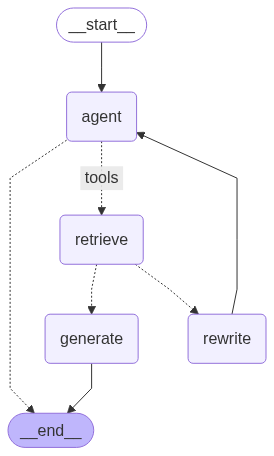

In [79]:
from langgraph.graph import START, END , StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display 
workflow = StateGraph(AgentState)

workflow.add_node('agent',agent)
retrieve = ToolNode(tools)
workflow.add_node('retrieve',retrieve)
workflow.add_node('rewrite',rewrite)
workflow.add_node('generate',generate)
workflow.add_edge(START,'agent')

#decide whether to retrieve 
workflow.add_conditional_edges(
    'agent',
    tools_condition,
    {
        'tools':'retrieve',
        END:END
    }
)
#edge taken after the 'agent' node is called
workflow.add_conditional_edges(
    'retrieve',
    grade_documents
)
workflow.add_edge('generate',END)
workflow.add_edge('rewrite','agent')

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [83]:
result = graph.invoke(
    {'messages': "what is langchain?"}
)

--------Call Agent---------
-------Check relevance--------
--------Decision: Docs relevant--------
--------Generate----------


In [84]:
result

{'messages': [HumanMessage(content='what is langchain?', additional_kwargs={}, response_metadata={}, id='16b3a48f-ad73-499c-80bd-27a6ef36d716'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '549j6vgkn', 'function': {'arguments': '{"query":"what is langchain"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 312, 'total_tokens': 334, 'completion_time': 0.029333333, 'prompt_time': 0.018414637, 'queue_time': 0.050375947000000004, 'total_time': 0.04774797}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c523237e5d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f09ea464-cec1-47e0-a79d-cb6f41d44589-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'what is langchain'}, 'id': '549j6vgkn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 22, 'total_tokens': 334}),
  ToolMessage(content='LangSm

In [85]:
for msg in result['messages']:
    msg.pretty_print()

================================ Human Message =================================

what is langchain?
================================== Ai Message ==================================
Tool Calls:
  retriever_vector_langchain_blog (549j6vgkn)
 Call ID: 549j6vgkn
  Args:
    query: what is langchain
================================= Tool Message =================================
Name: retriever_vector_langchain_blog

LangSmith Trace
https://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r
What LangGraph provides¶
By constructing each of the above in LangGraph, we get a few things:
Persistence: Human-in-the-Loop¶
LangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.
Persistence: Memory¶
LangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:
Streaming¶
LangGraph provides several ways to stream workflow / agent outp

In [90]:
result = graph.invoke(
    {'messages': "what is Langgraph?"}
)
for msg in result['messages']:
    msg.pretty_print()

--------Call Agent---------
-------Check relevance--------
--------Decision: Docs relevant--------
--------Generate----------
================================ Human Message =================================

what is Langgraph?
================================== Ai Message ==================================
Tool Calls:
  retriever_vector_langgraph_blog (61s9e25m6)
 Call ID: 61s9e25m6
  Args:
    query: what is Langgraph?
================================= Tool Message =================================
Name: retriever_vector_langgraph_blog

LangSmith Trace
https://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r
What LangGraph provides¶
By constructing each of the above in LangGraph, we get a few things:
Persistence: Human-in-the-Loop¶
LangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.
Persistence: Memory¶
LangGraph persistence layer supports conversational (short-term) memory and long-te